#### Importing Libraries

In [13]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import os as os
import seaborn as sns
import matplotlib.pyplot as plt

#### Load and Preview Dataset

In [14]:
# Load the dataset 
df = pd.read_csv('../../data/sierraleone.csv', encoding='latin1', parse_dates=['Timestamp'])
# Optional: Display the first few rows
df.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_19028\1081887019.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/sierraleone.csv', encoding='latin1', parse_dates=['Timestamp'])
C:\Users\pc\AppData\Local\Temp\ipykernel_19028\1081887019.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('../../data/sierraleone.csv', encoding='latin1', parse_dates=['Timestamp'])


Timestamp   GHI   DNI   DHI  ModA  ModB  Tamb    RH   WS WSgust  \
0  yyyy-mm-dd hh:mm  W/m²  W/m²  W/m²  W/m²  W/m²    °C     %  m/s    m/s   
1  2021-10-30 00:01  -0.7  -0.1  -0.8     0     0  21.9  99.1    0      0   
2  2021-10-30 00:02  -0.7  -0.1  -0.8     0     0  21.9  99.2    0      0   
3  2021-10-30 00:03  -0.7  -0.1  -0.8     0     0  21.9  99.2    0      0   
4  2021-10-30 00:04  -0.7     0  -0.8     0     0  21.9  99.3    0      0   

  WSstdev            WD WDstdev    BP Cleaning Precipitation TModA TModB  \
0     m/s  °N (to east)       °   hPa   1 or 0        mm/min    °C    °C   
1       0             0       0  1002        0             0  22.3  22.6   
2       0             0       0  1002        0             0  22.3  22.6   
3       0             0       0  1002        0             0  22.3  22.6   
4       0             0       0  1002        0           0.1  22.3  22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

####  Convert Timestamp and Clean Column Types

In [15]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
# Convert all other columns (except Timestamp and Comments) to numeric
for col in df.columns:
    if col not in ['Timestamp', 'Comments']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

C:\Users\pc\AppData\Local\Temp\ipykernel_19028\3908643666.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  float64       
 14  Cleaning       525600 non-null  float64       
 15  

#### Summary Stats & Missing Value Report

In [16]:
# Summary statistics
print("Summary Statistics:")
display(df.describe())

# Missing value report
missing_report = df.isna().sum()
missing_report = missing_report[missing_report > 0]
print("\nMissing Values:")
print(missing_report)

# Columns with >5% missing
threshold = 0.05 * len(df)
print("\nColumns with >5% Missing:")
print(missing_report[missing_report > threshold])

Summary Statistics:


Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:29.999999232     201.957515     116.376337   
min              2021-10-30 00:01:00     -19.500000      -7.800000   
25%              2022-01-29 06:00:45      -2.800000      -0.300000   
50%              2022-04-30 12:00:30       0.300000      -0.100000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     298.495150     218.652659   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      113.720571     206.643095     198.114691      26.319394   
min       -17.900000       0.000000       0.000000      12.300000   
25%        -3.800000       0.000000       0.000000      23.100000   
50%        -0.100000       3.600000       3.400000      25.300000   
75%       224.700000     359.500000     345.400000      29.400000   
max       892.000000    1507.000000    1473.000000      39.900000   
std       158.946032     300.896893     288.889073       4.398605   

                  RH             WS         WSgust        WSstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean       79.448857       1.146113       1.691606       0.363823   
min         9.900000       0.000000       0.000000       0.000000   
25%        68.700000       0.000000       0.000000       0.000000   
50%        85.400000       0.800000       1.600000       0.400000   
75%        96.700000       2.000000       2.600000       0.600000   
max       100.000000      19.200000      23.900000       4.100000   
std        20.520775       1.239248       1.617053       0.295000   

                  WD        WDstdev             BP       Cleaning  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      133.044668       7.172220     999.876469       0.000967   
min         0.000000       0.000000     993.000000       0.000000   
25%         0.000000       0.000000     999.000000       0.000000   
50%       161.500000       6.200000    1000.000000       0.000000   
75%       234.100000      12.000000    1001.000000       0.000000   
max       360.000000      98.400000    1006.000000       1.000000   
std       114.284792       7.535093       2.104419       0.031074   

       Precipitation          TModA          TModB  Comments  
count  525600.000000  525600.000000  525600.000000       0.0  
mean        0.004806      32.504263      32.593091       NaN  
min         0.000000      10.700000      11.100000       NaN  
25%         0.000000      23.500000      23.800000       NaN  
50%         0.000000      26.600000      26.900000       NaN  
75%         0.000000      40.900000      41.300000       NaN  
max         2.400000      72.800000      70.400000       NaN  
std         0.047556      12.434899      12.009161       NaN


Missing Values:
Timestamp             1
GHI                   1
DNI                   1
DHI                   1
ModA                  1
ModB                  1
Tamb                  1
RH                    1
WS                    1
WSgust                1
WSstdev               1
WD                    1
WDstdev               1
BP                    1
Cleaning              1
Precipitation         1
TModA                 1
TModB                 1
Comments         525601
dtype: int64

Columns with >5% Missing:
Comments    525601
dtype: int64


#### Outlier Detection with Z-Scores

In [17]:
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate z-scores
z_scores = df[key_columns].apply(zscore)

# Flag outliers
outliers = (np.abs(z_scores) > 3)
print(f"Outliers detected:\n{outliers.sum()}")
df['cleaned_flag'] = ~outliers.any(axis=1)  # True = clean row


Outliers detected:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


#### Handle Missing Values & Export Cleaned Dataset

In [18]:
# Impute missing values in key columns with median
for col in key_columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Optional: drop non-essential columns with too many nulls (manual decision if needed)

# Export cleaned data
df_clean = df[df['cleaned_flag']].copy()
df_clean.to_csv('../../data/sierraleone_clean.csv', index=False)

print("Cleaned data exported to: ../../data/sierraleone_clean.csv")

Cleaned data exported to: ../../data/sierraleone_clean.csv


#### Monthly Trends of Solar Irradiance & Temperature

C:\Users\pc\AppData\Local\Temp\ipykernel_19028\1032880048.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()


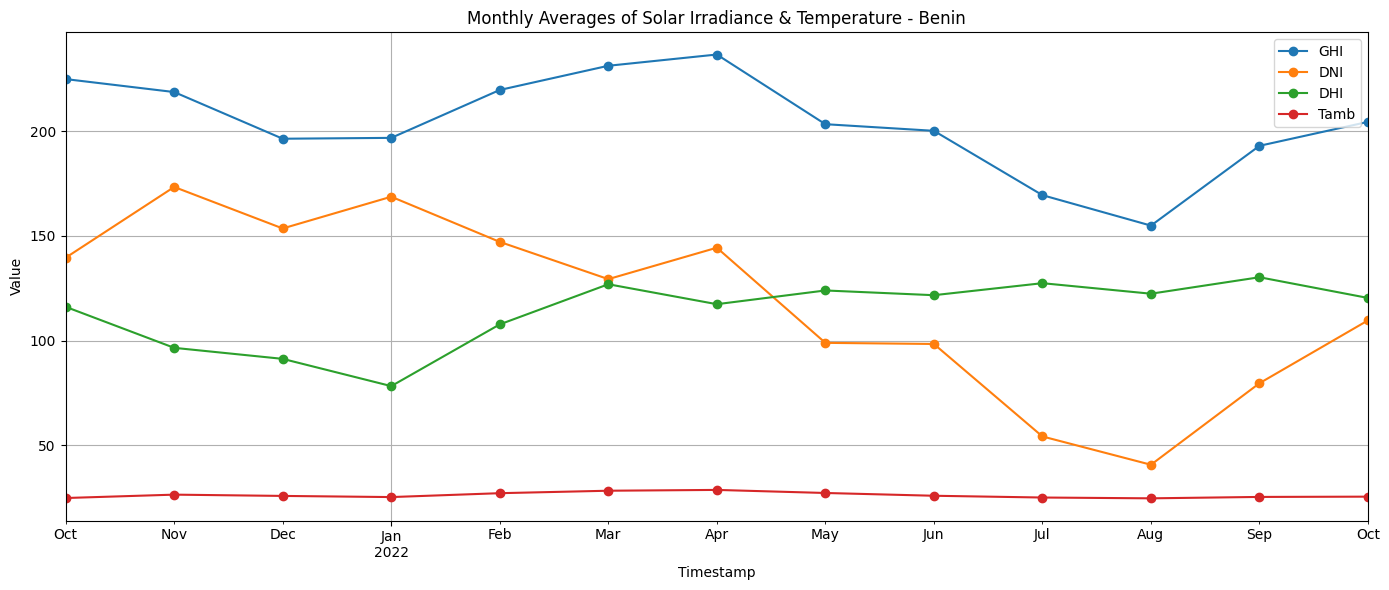

In [19]:
# Ensure Timestamp is datetime and set as index
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

# Resample monthly averages
monthly_avg = df_clean[['GHI', 'DNI', 'DHI', 'Tamb']].resample('M').mean()

# Plot
monthly_avg.plot(figsize=(14, 6), marker='o')
plt.title("Monthly Averages of Solar Irradiance & Temperature - Benin")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Impact of Cleaning on ModA and ModB Values

C:\Users\pc\AppData\Local\Temp\ipykernel_19028\2367044153.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_full = pd.read_csv('../../data/sierraleone.csv', parse_dates=['Timestamp'], encoding='latin1', low_memory=False)
C:\Users\pc\AppData\Local\Temp\ipykernel_19028\2367044153.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_full[col].fillna(median_val, inplace=True)
C:\Users\

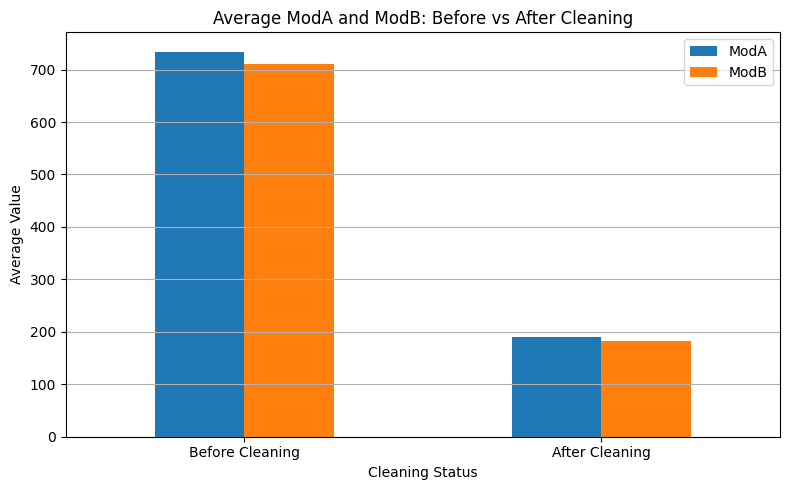

In [20]:
# Load full original data again to compare pre-cleaning
df_full = pd.read_csv('../../data/sierraleone.csv', parse_dates=['Timestamp'], encoding='latin1', low_memory=False)

key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Convert key columns to numeric, coercing errors to NaN
for col in key_columns:
    df_full[col] = pd.to_numeric(df_full[col], errors='coerce')

# Fill NaNs in key columns with median (or drop rows with NaN if preferred)
for col in key_columns:
    median_val = df_full[col].median()
    df_full[col].fillna(median_val, inplace=True)

# Compute z-scores on the cleaned numeric data
z_scores_full = df_full[key_columns].apply(zscore)

# Flag rows where any |z-score| > 3 as outliers (False = outlier, True = clean)
df_full['cleaned_flag'] = ~z_scores_full.abs().gt(3).any(axis=1)

# Group by cleaning flag and compute mean of ModA and ModB
impact_avg = df_full.groupby('cleaned_flag')[['ModA', 'ModB']].mean()
impact_avg.index = ['Before Cleaning', 'After Cleaning']

# Plot the comparison
impact_avg.plot(kind='bar', figsize=(8, 5), rot=0)
plt.title('Average ModA and ModB: Before vs After Cleaning')
plt.ylabel('Average Value')
plt.xlabel('Cleaning Status')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

#### Correlation Heatmap & Scatter Plots for Key Variables

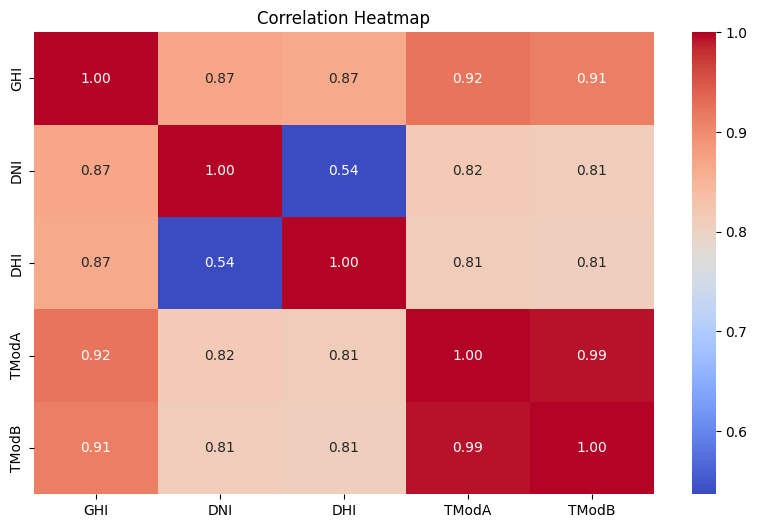

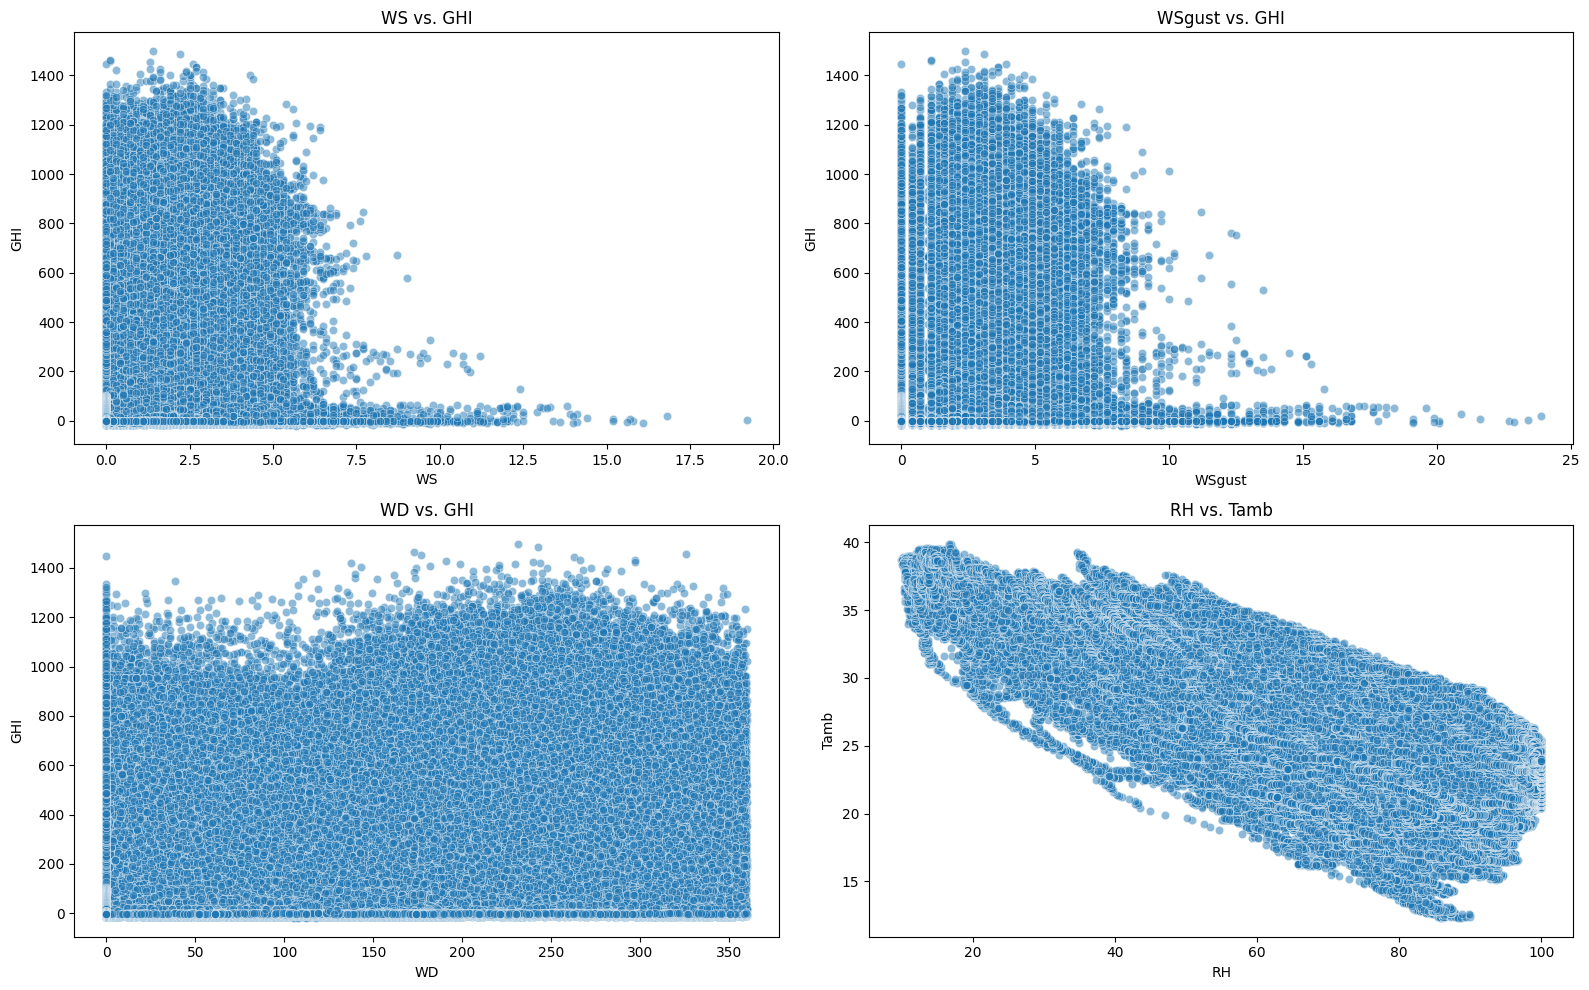

In [21]:
# Heatmap
plt.figure(figsize=(10, 6))
corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots
plt.figure(figsize=(16, 10))
for i, col in enumerate(['WS', 'WSgust', 'WD']):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df_clean, x=col, y='GHI', alpha=0.5)
    plt.title(f'{col} vs. GHI')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_clean, x='RH', y='Tamb', alpha=0.5)
plt.title('RH vs. Tamb')
plt.tight_layout()
plt.show()


#### Distribution Analysis & Wind Rose Visualization

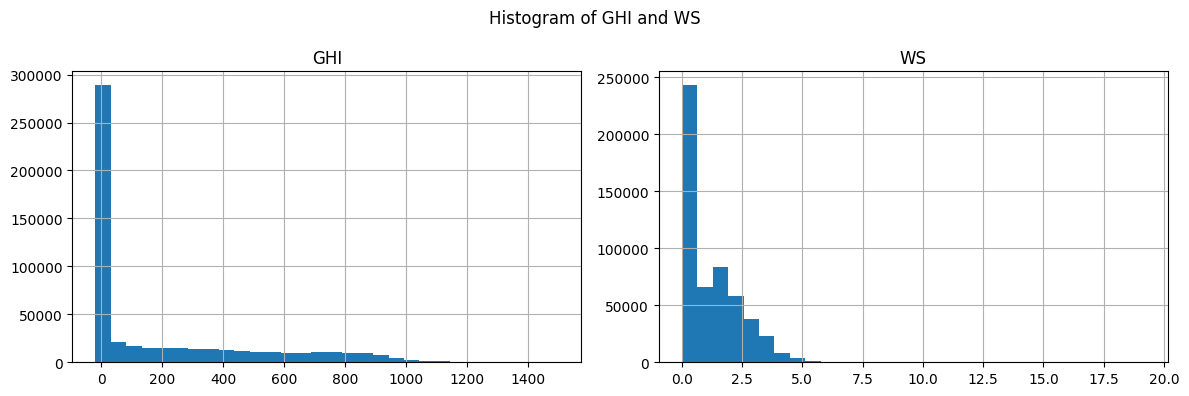

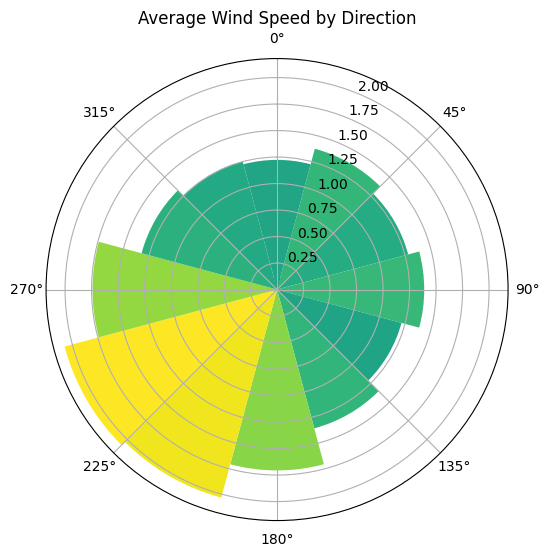

In [23]:
# Histograms
df_clean[['GHI', 'WS']].hist(bins=30, figsize=(12, 4), layout=(1, 2))
plt.suptitle("Histogram of GHI and WS")
plt.tight_layout()
plt.show()

# Wind rose (simplified radial plot)
import matplotlib.cm as cm
df_clean['WD_bin'] = (df_clean['WD'] // 30) * 30  # binning directions

wind_rose = df_clean.groupby('WD_bin')['WS'].mean()
angles = np.deg2rad(wind_rose.index)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
bars = ax.bar(angles, wind_rose.values, width=np.deg2rad(30), bottom=0.0, color=cm.viridis(wind_rose.values / max(wind_rose.values)))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.title("Average Wind Speed by Direction")
plt.show()


#### Scatter Plot: Relative Humidity vs Global Horizontal Irradiance (GHI)

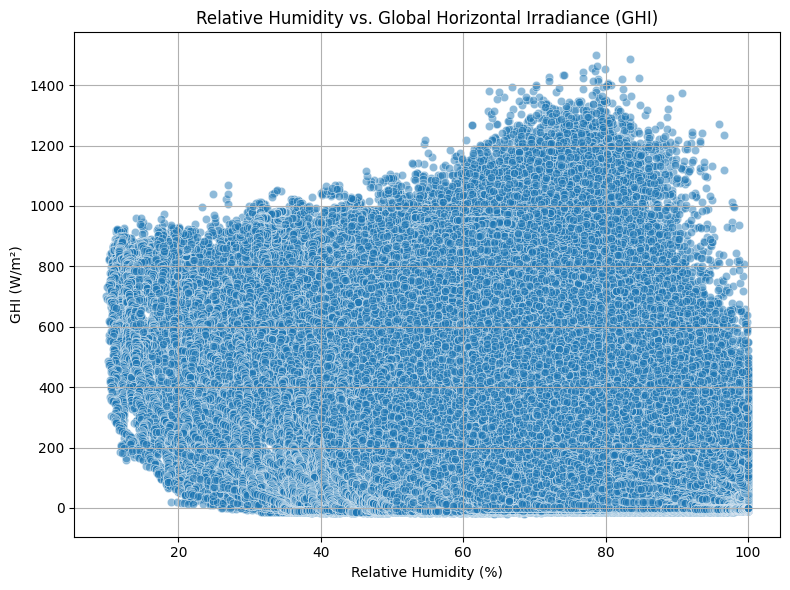

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='RH', y='GHI', alpha=0.5)
plt.title('Relative Humidity vs. Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Bubble Plot: GHI vs Ambient Temperature (Bubble size = Relative Humidity)

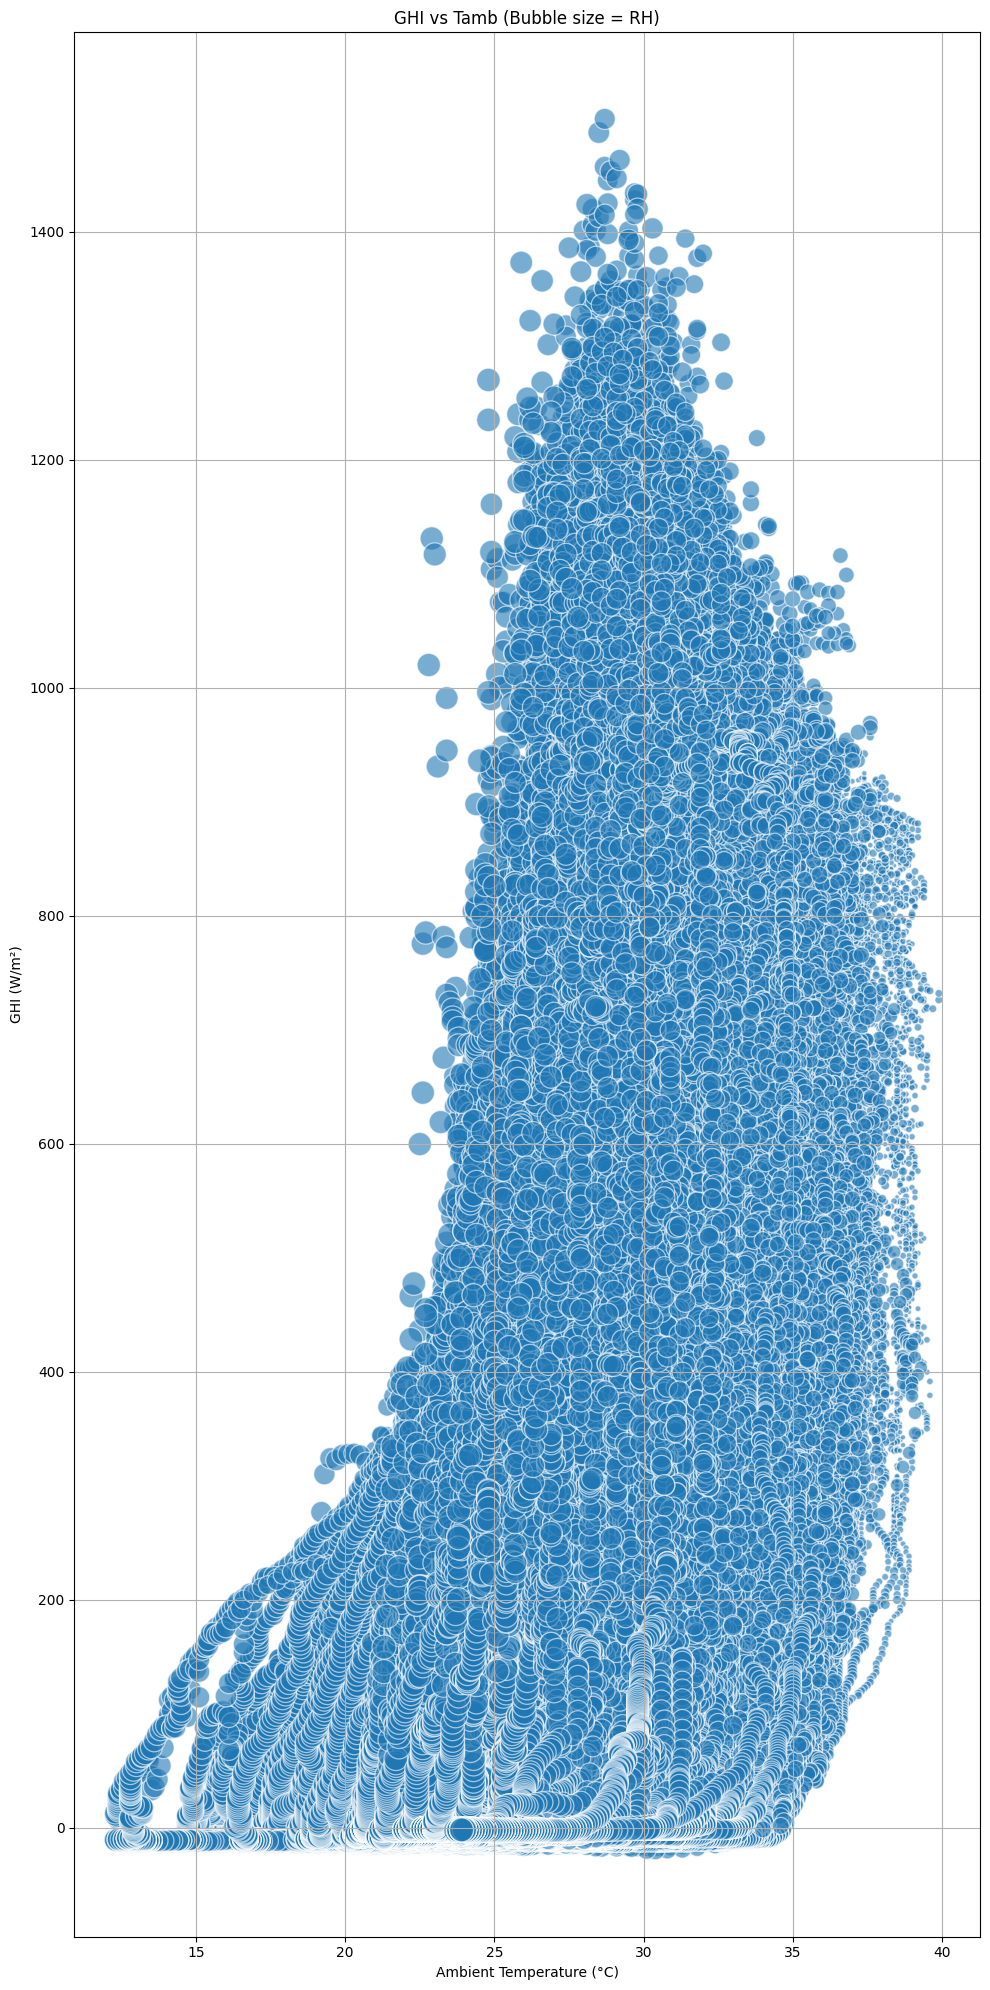

In [25]:
plt.figure(figsize=(10, 20))
sns.scatterplot(data=df_clean, x='Tamb', y='GHI', size='RH', alpha=0.6, sizes=(10, 300), legend=False)
plt.title('GHI vs Tamb (Bubble size = RH)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.tight_layout()
plt.show()
